In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('../data/articles.csv',encoding='cp1252')
df.head(5)

,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bell’s Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours d’Olivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive


In [12]:
df.isna().sum()

Id                         0
Heading                    0
Article.Banner.Image    2552
Outlets                    0
Article.Description        0
Full_Article               0
Article_Type               0
Tonality                 432
dtype: int64

In [13]:
df.shape

(4305, 8)

In [ ]:
# ID , Article.Banner.Image remove



In [15]:
df['Article_Type'].value_counts()

Article_Type
Commercial            2470
Military              1677
Executives              65
Others                  52
Support & Services      26
Financing                9
Training                 6
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Article_Type'>

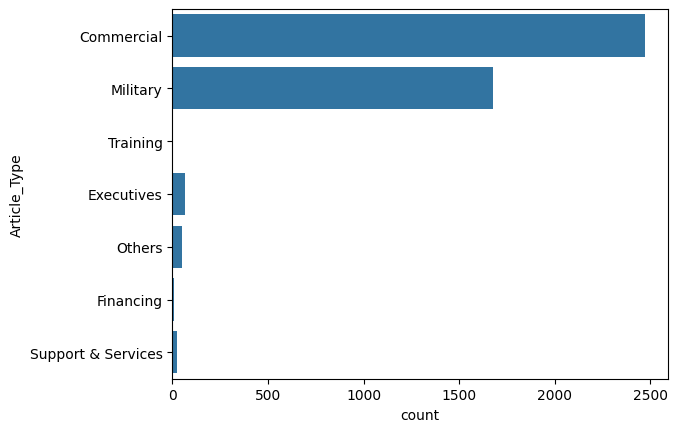

In [17]:
sns.countplot(df['Article_Type'])

<Axes: xlabel='Tonality', ylabel='count'>

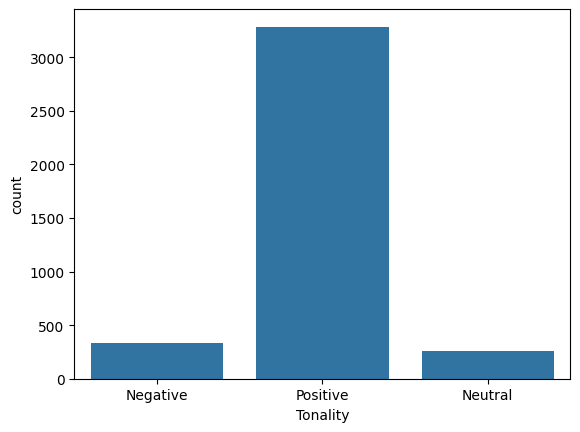

In [18]:
sns.countplot(x=df['Tonality'])

In [3]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data (
# make sure you run this the first time)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karuppasamy.v\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karuppasamy.v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# We have to do some preprocess  data like convert to lowercase , url removal and specil charater letter convert to lowercase ,stopword removal and other etc what we have clean our text
class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
    
    def preprocess(self, text):
        """
        Preprocess the input text by applying various text cleaning steps.
        
        Args:
        - text (str): The raw text input.

        Returns:
        - str: The preprocessed text.
        """

        text = self.remove_html_tags(text)
        
        # 1. Convert to lowercase
        text = text.lower()
        
        # 2. Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # 3. Remove special characters and punctuation
        text = re.sub(r'\W', ' ', text)
        
        # 4. Remove numbers
        text = re.sub(r'\d+', '', text)
        
        # 5. Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        
        # 6. Tokenize the text
        words = word_tokenize(text)
        
        # 7. Remove stopwords
        words = [word for word in words if word not in self.stop_words]
        
        # 8. (Optional) Stemming/Lemmatization can be added here

        # Rejoin the cleaned words into a single string
        cleaned_text = ' '.join(words)
        
        return cleaned_text

# Example usage
if __name__ == "__main__":
    text = "This is a sample article! Visit https://example.com for more information. Call 123-456-7890."
    
    preprocessor = TextPreprocessor()
    clean_text = preprocessor.preprocess(text)
    
    print("Original Text:", text)
    print("Cleaned Text:", clean_text)


Original Text: This is a sample article! Visit https://example.com for more information. Call 123-456-7890.
Cleaned Text: sample article visit information call


In [4]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

# Download NLTK data (make sure you run this the first time)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
        """
        Preprocess the input text by applying various text cleaning steps.
        
        Args:
        - text (str): The raw text input.

        Returns:
        - str: The preprocessed text.
        """
        text=html_tag_remove(text)
        # 1. Convert to lowercase
        text = text.lower()
        
        # 2. Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # 3. Remove special characters and punctuation
        text = re.sub(r'\W', ' ', text)
        
        # 4. Remove numbers
        #text = re.sub(r'\d+', '', text)
        
        # 5. Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        
        # 6. Tokenize the text
        words = word_tokenize(text)
        
        # 7. Remove stopwords
        words = [word for word in words if word not in stop_words]
        
        # 8. (Optional) Stemming/Lemmatization can be added here

        # Rejoin the cleaned words into a single string
        cleaned_text = ' '.join(words)

        return cleaned_text

def html_tag_remove(text):
        soup=BeautifulSoup(text,"html.parser")
        clean=soup.get_text()
        return clean


df['CleanedHeading']=df['Heading'].apply(lambda x :preprocess(x))
df['CleanedArticleDesc']=df['Article.Description'].apply(lambda x :preprocess(x))
df['ClenedFullArticle']=df['Full_Article'].apply(lambda x:preprocess(x))



#df['']
clean_df=df.drop(columns=['Id','Heading','Article.Banner.Image','Article.Description','Full_Article','Outlets'],axis=1)


#clean_df

#clean_df.to_csv("../data/clean_articles.csv")
#! pip install transformers
Article_type={"Commercial" : 0,
"Military" : 1,
"Executives" :2,
"Others" :3,
"Support & Services" :4 ,
"Financing" :5 ,
"Training" :6}
clean_df['CleanedArticle_Type']=clean_df['Article_Type'].map(Article_type)
clean_df=clean_df.drop(columns=['Article_Type','Tonality']) 
clean_df
clean_df=clean_df.drop(columns=['CleanedHeading','CleanedArticleDesc','ClenedFullArticle'],axis=1)
clean_df.head(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karuppasamy.v\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karuppasamy.v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\karuppasamy.v\AppData\Local\Temp\ipykernel_21312\177651733.py:52: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")
C:\Users\karuppasamy.v\AppData\Local\Temp\ipykernel_21312\177651733.py:52: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")


In [5]:
df['CleanedHeading']=df['Heading'].apply(lambda x :preprocess(x))
df['CleanedArticleDesc']=df['Article.Description'].apply(lambda x :preprocess(x))
df['ClenedFullArticle']=df['Full_Article'].apply(lambda x:preprocess(x))


#df['']

C:\Users\karuppasamy.v\AppData\Local\Temp\ipykernel_6768\1147892441.py:52: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")
C:\Users\karuppasamy.v\AppData\Local\Temp\ipykernel_6768\1147892441.py:52: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(text,"html.parser")


In [5]:
#clean_df.to_csv("../data/clean_articles.csv")
#! pip install transformers
Article_type={"Commercial" : 0,
"Military" : 1,
"Executives" :2,
"Others" :3,
"Support & Services" :4 ,
"Financing" :5 ,
"Training" :6}
clean_df['CleanedArticle_Type']=clean_df['Article_Type'].map(Article_type)
clean_df=clean_df.drop(columns=['Article_Type','Tonality']) 
clean_df
clean_df=clean_df.drop(columns=['CleanedHeading','CleanedArticleDesc','ClenedFullArticle'],axis=1)
clean_df.head(5)
# Tonality_Type={"Positive":0,"Negative":1,"Neutral":2}
# clean_df['Clened_Tonality']=clean_df['Tonality'].map(Tonality_Type)
# # drop
# clean_df['Tonality']=clean_df['Tonality'].fillna(value="Positive")



,CleanedHeading,CleanedArticleDesc,ClenedFullArticle,CleanedArticle_Type
0,puzzling maneuver freefall ntsb report provide...,helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,0
1,bell nexus air taxi concept rings changes evto...,year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,0
2,bell helicopter show air taxi nexus,bell released full size design vertical take l...,bell released full size design vertical take l...,0
3,bell dévoile la conception intégrale de son ta...,bell est une société américaine dirigée par mi...,bell est une société américaine dirigée par mi...,0
4,les premiers retours olivier ezratty,still anecdotal observe explosion passenger dr...,still anecdotal observe explosion passenger dr...,0
...,...,...,...,...
4300,chinook catches army flirting younger thinner ...,long rumored tensions came head ch 47 chinook ...,long rumored tensions came head ch 47 chinook ...,1
4301,lufthansa aviation selects reiser simulation h...,course upcoming investments new training equip...,course upcoming investments new training equip...,0
4302,bell flight drone delivering pizza,bell flight fort worth engineers working drone...,bell flight fort worth engineers working drone...,1
4303,blade offers new york airport transfers 195 ai...,getting price point took five years began char...,getting price point took five years began char...,0


In [46]:
clean_df.to_csv("../data/CleanedData.csv")



In [6]:
clean_df['CombinedArticle']=clean_df["CleanedHeading"]+clean_df["CleanedArticleDesc"]+clean_df["ClenedFullArticle"]

In [7]:
clean_df=clean_df.drop(columns=['CleanedHeading','CleanedArticleDesc','ClenedFullArticle'],axis=1)
clean_df.head(5)

,CleanedArticle_Type,CombinedArticle
0,0,puzzling maneuver freefall ntsb report provide...
1,0,bell nexus air taxi concept rings changes evto...
2,0,bell helicopter show air taxi nexusbell releas...
3,0,bell dévoile la conception intégrale de son ta...
4,0,les premiers retours olivier ezrattystill anec...


In [40]:
cdf=pd.read_csv("../data/CleanedData.csv")


In [45]:
cdf['CombinedArticle'][915]

'airbus posts 45b revenue 9 monthsairbus helicopters delivered 218 units revenues stable comparable basis net helicopter orders increased 230 units including 6 super puma family 36 h145s third quarter aloneairbus helicopters delivered 218 units revenues stable comparable basis net helicopter orders increased 230 units including 6 super puma family 36 h145s third quarter alone'

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


#Features & Target
X=clean_df['CombinedArticle']
y=clean_df['CleanedArticle_Type']

# Step 3: Apply TfidfVectorizer on the combined text column
tfidVector = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidVector.fit_transform(X)

# Step 4: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=33)

# Step 5: Train a logistic regression model
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

# Step 6: Evaluate the model (e.g., using accuracy score)
from sklearn.metrics import accuracy_score
y_pred = lg_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))


combined_text = "'chinook catches army flirting younger thinner aircraftlong rumored tensions came head ch 47 chinook helicopter confronted u army discovering suggestive text messages army phone sources confirmed todaylong rumored tensions came head ch 47 chinook helicopter confronted u army discovering suggestive text messages army phone sources confirmed today'"

input_vector=tfidVector.transform([combined_text])

prediction_result=lg_model.predict(input_vector)

prediction_result


# Create a reverse mapping from numbers to category names
reverse_category_mapping = {v: k for k, v in Article_type.items()}

predicted_category = reverse_category_mapping.get(prediction_result[0], "Unknown Category")

predicted_category


Accuracy: 0.9304


In [13]:
from sklearn.metrics import classification_report
import warnings

warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       241
           1       0.95      0.95      0.95       170
           2       1.00      0.55      0.71        11
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1

    accuracy                           0.93       431
   macro avg       0.48      0.41      0.43       431
weighted avg       0.91      0.93      0.92       431



In [ ]:
combined_text = "'chinook catches army flirting younger thinner aircraftlong rumored tensions came head ch 47 chinook helicopter confronted u army discovering suggestive text messages army phone sources confirmed todaylong rumored tensions came head ch 47 chinook helicopter confronted u army discovering suggestive text messages army phone sources confirmed today'"

input_vector=tfidVector.transform([combined_text])

prediction_result=lg_model.predict(input_vector)

prediction_result


# Create a reverse mapping from numbers to category names
reverse_category_mapping = {v: k for k, v in Article_type.items()}

predicted_category = reverse_category_mapping.get(prediction_result[0], "Unknown Category")

predicted_category

In [ ]:
pd.read_csv()

In [14]:
import requests
from bs4 import BeautifulSoup
import pickle

def scrape_article(url):
    """
    Scrape the article from the given URL and extract the heading, description, and full article.
    
    Args:
    - url (str): The URL of the article.
    
    Returns:
    - dict: A dictionary containing the 'heading', 'description', and 'full_article'.
    """
    # Fetch the content of the URL
    response = requests.get(url)
    
    # Parse the page content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract heading (assuming it's in <h1>)
    heading = soup.find('h1').get_text(strip=True)
    
    # Extract article description (assuming it's in a <meta name="description"> tag)
    description = soup.find('meta', attrs={'name': 'description'})
    if description:
        description = description['content']
    else:
        description = ''
    
    # Extract full article (assuming the article text is inside <div class="article-body">)
    full_article_div = soup.find('div', class_='article-body')
    full_article = ' '.join(p.get_text(strip=True) for p in full_article_div.find_all('p'))
    
    return {
        'heading': heading,
        'description': description,
        'full_article': full_article
    }

def combine_text(heading, description, full_article):
    """
    Combine the heading, description, and full article into a single text.
    
    Args:
    - heading (str): The article's heading.
    - description (str): The article's description.
    - full_article (str): The full text of the article.
    
    Returns:
    - str: The combined text.
    """
    combined_text = heading + " " + description + " " + full_article
    return combined_text


# Example URL (replace with the actual article URL)
url = 'https://example.com/sample-article'

# Step 1: Scrape the article content
article_data = scrape_article(url)

# Step 2: Combine the text from heading, description, and full article
#combine_text(article_data['heading'], article_data['description'], article_data['full_article'])

# # Step 3: Make a prediction using the pre-trained model
# prediction = make_prediction(combined_text)

# print(f"Prediction for the article: {prediction}")


SSLError: HTTPSConnectionPool(host='example.com', port=443): Max retries exceeded with url: /sample-article (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))

array([1], dtype=int64)

In [32]:
Article_type

{'Commercial': 0,
 'Military': 1,
 'Executives': 2,
 'Others': 3,
 'Support & Services': 4,
 'Financing': 5,
 'Training': 6}

In [31]:

# Create a reverse mapping from numbers to category names
reverse_category_mapping = {v: k for k, v in Article_type.items()}

predicted_category = reverse_category_mapping.get(prediction_result[0], "Unknown Category")

predicted_category

'Military'

'chinook catches army flirting younger thinner aircraftlong rumored tensions came head ch 47 chinook helicopter confronted u army discovering suggestive text messages army phone sources confirmed todaylong rumored tensions came head ch 47 chinook helicopter confronted u army discovering suggestive text messages army phone sources confirmed today'

In [9]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

class BERTTextClassifier:
    def __init__(self, pretrained_model_name='bert-base-uncased'):
       
        # Load BERT tokenizer and model
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_model_name)
        self.bert_model = BertModel.from_pretrained(pretrained_model_name)
    
    def tokenize(self, text_list):
       
        encoding = self.tokenizer(
            text_list,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )
        return encoding
    
    def get_bert_embeddings(self, text_list):
        
        # Tokenize the input texts
        with torch.no_grad():
            encoding = self.tokenize(text_list)
            # Pass through BERT model to get hidden states
            outputs = self.bert_model(**encoding)
            # Use the [CLS] token embedding for classification (output at index 0)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        return cls_embeddings
    
    def train_model(self, X, y):
       
        # Step 1: Generate BERT embeddings for input texts
        X_embeddings = self.get_bert_embeddings(X)
        
        # Step 2: Split the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)
        
        # Step 3: Train a classifier (e.g., Logistic Regression)
        classifier = LogisticRegression(max_iter=1000)
        classifier.fit(X_train, y_train)
        
        # Step 4: Make predictions on the test set
        y_pred = classifier.predict(X_test)
        
        # Step 5: Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Test Accuracy: {accuracy:.4f}")
        
        return classifier

# # Example usage
# if __name__ == "__main__":
#     # Sample data
#     X = [
#         "This is a positive review",
#         "This is a negative review",
#         "I love this product",
#         "I hate this product",
#         "This is the best thing ever",
#         "This is the worst thing ever"
#     ]
#     y = [1, 0, 1, 0, 1, 0]  # 1 for positive, 0 for negative
    
#     # Initialize BERTTextClassifier
#     classifier = BERTTextClassifier()

#     # Train the model
#     trained_model = classifier.train_model(X, y)


c:\Users\karuppasamy.v\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vector=CountVectorizer()

text=["from nltk.tokenize import sent_tokenize","from nltk.tokenize import sent_tokenize"]
vector_text=vector.fit_transform(text)
vector_text



<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>